<a href="https://colab.research.google.com/github/MahimnaDarji/Cricket-Analysis/blob/main/IPL_Stats_Analysis(Bowling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IPL Bowling Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/deliveries_updated_mens_ipl.csv')

In [ ]:
data.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

matchId               int64
inning                int64
over_ball           float64
over                  int64
ball                  int64
batting_team         object
bowling_team         object
batsman              object
non_striker          object
bowler               object
batsman_runs          int64
extras                int64
isWide              float64
isNoBall            float64
Byes                float64
LegByes             float64
Penalty             float64
dismissal_kind       object
player_dismissed     object
dtype: object

In [ ]:
data['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field',
       'retired out'], dtype=object)

In [ ]:
def isbowlerwicket(player_dismissed,dismissal_kind):
  if type(player_dismissed) == str:
    if dismissal_kind not in ['run out','retired hurt','obstructing the field']:
      return 1
    else:
      return 0
  else:
    return 0

In [ ]:
data['bowlerwkt']=data.apply(lambda x:isbowlerwicket(x['player_dismissed'],x['dismissal_kind']),axis=1)

####Top 10 Wicket Takers in IPL

In [ ]:
data.groupby('bowler')['bowlerwkt'].sum().sort_values(ascending=False).head(10)

bowler
DJ Bravo           183
SL Malinga         170
YS Chahal          166
A Mishra           166
PP Chawla          157
R Ashwin           157
B Kumar            154
SP Narine          152
Harbhajan Singh    150
JJ Bumrah          148
Name: bowlerwkt, dtype: int64

In [ ]:
def phase(over):
  if over < 6:
    return 'Powerplay'
  elif over <= 15:
    return 'Middle Overs'
  else:
    return 'Death Overs'

In [ ]:
data['phase']=data['over'].apply(lambda x:phase(x))

In [ ]:
data.head(5)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,...,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,bowlerwkt,phase
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Powerplay
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Powerplay
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Powerplay
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Powerplay
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,Powerplay


In [ ]:
data['total_runs']=data.apply(lambda x:(x['batsman_runs']+x['extras']),axis=1)

In [ ]:
def runs_per_wickets(runs,wickets):
  if wickets>0:
    return runs/wickets
  else:
    return 0

def balls_per_wickets(balls,wickets):
  if wickets>0:
    return balls/wickets
  else:
    return 0

def runs_per_ball(runs,balls):
  if balls>0:
    return runs/balls
  else:
    return 0

def statsbyinnings(data,currentinnings):
  data=data[data.inning == currentinnings]
  data.reset_index(inplace=True,drop=True)

  data['isDot']=data['total_runs'].apply(lambda x: 1 if x==0 else 0)
  data['isFour']=data['batsman_runs'].apply(lambda x: 1 if x==4 else 0)
  data['isSix']=data['batsman_runs'].apply(lambda x: 1 if x==6 else 0)

  runs=pd.DataFrame(data.groupby('bowler')['total_runs'].sum()).reset_index().rename(columns={'total_runs':'Runs'})
  innings=pd.DataFrame(data.groupby('bowler')['matchId'].apply(lambda x:len(list(np.unique(x))))).reset_index().rename(columns={'matchId':'Innings'})
  balls=pd.DataFrame(data.groupby('bowler')['matchId'].count()).reset_index().rename(columns={'matchId':'Balls'})
  wickets=pd.DataFrame(data.groupby('bowler')['bowlerwkt'].sum()).reset_index().rename(columns={'bowlerwkt':'Wickets'})

  dots=pd.DataFrame(data.groupby('bowler')['isDot'].sum()).reset_index().rename(columns={'isDot':'Dots'})
  fours=pd.DataFrame(data.groupby('bowler')['isFour'].sum()).reset_index().rename(columns={'isFour':'Fours'})
  sixes=pd.DataFrame(data.groupby('bowler')['isSix'].sum()).reset_index().rename(columns={'isSix':'Sixes'})

  data=pd.merge(innings,runs,on='bowler').merge(balls,on='bowler').merge(wickets,on='bowler').merge(dots,on='bowler').merge(fours,on='bowler').merge(sixes,on='bowler')
  data['Avg']=data.apply(lambda x: runs_per_wickets(x['Runs'],x['Wickets']),axis=1)
  data['SR']=data.apply(lambda x: balls_per_wickets(x['Balls'],x['Wickets']),axis=1)
  data['Eco']=data.apply(lambda x:6*(runs_per_ball(x['Runs'],x['Balls'])),axis=1)
  data['dot%']=data.apply(lambda x: 100*(x['Dots']/x['Balls']),axis=1)

  return data

###1st Innings Stats

In [ ]:
firstinn=statsbyinnings(data,1)

In [ ]:
firstinn.head(10)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,8,148,98,7,26,10,7,21.142857,14.000000,9.061224,26.530612
1,A Badoni,1,6,6,1,2,0,0,6.000000,6.000000,6.000000,33.333333
2,A Chandila,6,142,120,3,51,15,4,47.333333,40.000000,7.100000,42.500000
3,A Choudhary,2,72,52,3,18,6,3,24.000000,17.333333,8.307692,34.615385
4,A Flintoff,2,95,48,1,10,6,7,95.000000,48.000000,11.875000,20.833333
5,A Kumble,25,664,590,27,215,38,22,24.592593,21.851852,6.752542,36.440678
6,A Mishra,71,1857,1520,67,520,112,79,27.716418,22.686567,7.330263,34.210526
7,A Mithun,10,294,193,5,53,21,15,58.800000,38.600000,9.139896,27.461140
8,A Nehra,44,1304,1006,59,405,136,42,22.101695,17.050847,7.777336,40.258449
9,A Nortje,11,393,271,18,101,40,15,21.833333,15.055556,8.701107,37.269373


###2nd Innings Stats

In [ ]:
secondinn=statsbyinnings(data,2)

In [ ]:
secondinn.head(10)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,12,252,172,11,53,16,13,22.909091,15.636364,8.790698,30.813953
1,A Badoni,1,6,6,1,1,0,0,6.000000,6.000000,6.000000,16.666667
2,A Chandila,6,103,114,8,52,2,6,12.875000,14.250000,5.421053,45.614035
3,A Choudhary,3,72,56,2,24,7,3,36.000000,28.000000,7.714286,42.857143
4,A Dananjaya,1,47,25,0,6,2,4,0.000000,0.000000,11.280000,24.000000
5,A Flintoff,1,11,18,1,10,1,0,11.000000,18.000000,3.666667,55.555556
6,A Kumble,17,425,393,18,159,34,13,23.611111,21.833333,6.488550,40.458015
7,A Mishra,83,2165,1797,99,630,116,97,21.868687,18.151515,7.228715,35.058431
8,A Mithun,6,183,119,2,37,21,6,91.500000,59.500000,9.226891,31.092437
9,A Nehra,44,1233,968,47,393,143,34,26.234043,20.595745,7.642562,40.599174


####Top 10 Wicket Takers in 1st Innings

In [ ]:
firstinn.groupby('bowler')['Wickets'].sum().sort_values(ascending=False).head(10)

bowler
DJ Bravo      94
UT Yadav      93
B Kumar       87
SP Narine     87
SL Malinga    84
PP Chawla     84
YS Chahal     73
JJ Bumrah     70
A Mishra      67
RA Jadeja     66
Name: Wickets, dtype: int64

In [ ]:
firstinn.groupby('bowler')['Dots'].sum().sort_values(ascending=False).head(10)

bowler
SP Narine          798
UT Yadav           685
B Kumar            684
PP Chawla          635
Harbhajan Singh    605
R Ashwin           566
P Kumar            540
JJ Bumrah          539
RA Jadeja          534
A Mishra           520
Name: Dots, dtype: int64

####Top 10 Wicket Takers in 2nd Innings

In [ ]:
secondinn.groupby('bowler')['Wickets'].sum().sort_values(ascending=False).head(10)

bowler
A Mishra           99
R Ashwin           95
YS Chahal          93
Harbhajan Singh    92
DJ Bravo           89
SL Malinga         86
JJ Bumrah          75
PP Chawla          73
B Kumar            67
RA Jadeja          66
Name: Wickets, dtype: int64

In [ ]:
secondinn.groupby('bowler')['Dots'].sum().sort_values(ascending=False).head(10)

bowler
R Ashwin           811
B Kumar            701
Harbhajan Singh    658
A Mishra           630
SL Malinga         629
DW Steyn           591
YS Chahal          588
SP Narine          565
JJ Bumrah          539
P Kumar            535
Name: Dots, dtype: int64

In [ ]:
comp=firstinn[['bowler','dot%']].merge(secondinn[['bowler','dot%']],on='bowler',how='inner').rename(columns={'dot%_x':'1st_inn_dot%','dot%_y':'2nd_inn_dot%'})
comp.head(5)

,bowler,1st_inn_dot%,2nd_inn_dot%
0,A Ashish Reddy,26.530612,30.813953
1,A Badoni,33.333333,16.666667
2,A Chandila,42.500000,45.614035
3,A Choudhary,34.615385,42.857143
4,A Flintoff,20.833333,55.555556


[]

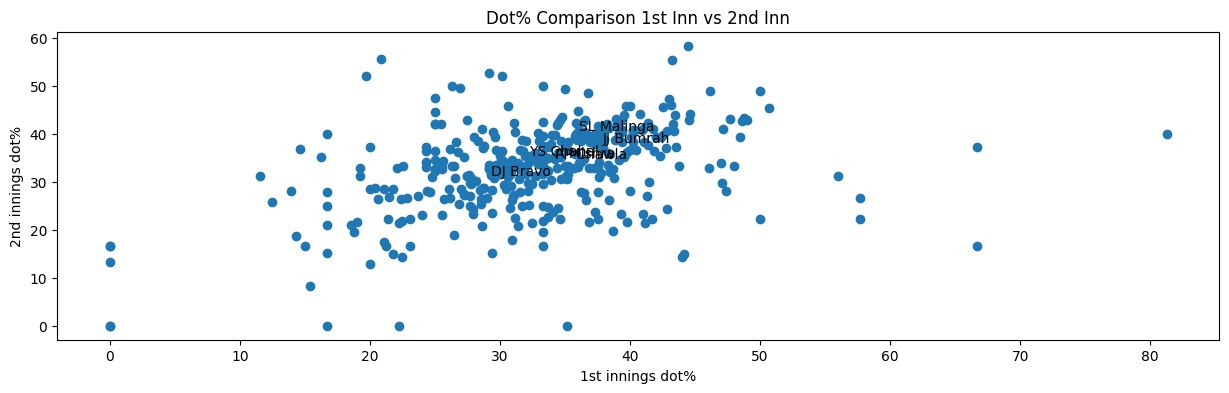

In [ ]:
plt.figure(figsize=(15,4))
plt.scatter(comp['1st_inn_dot%'],comp['2nd_inn_dot%'])
plt.xlabel('1st innings dot%')
plt.ylabel('2nd innings dot%')
plt.title('Dot% Comparison 1st Inn vs 2nd Inn')
annotations=list(comp['bowler'])
players=['DJ Bravo','SL Malinga','YS Chahal','A Mishra','PP Chawla','JJ Bumrah']

for i,label in enumerate(annotations):
  if label in players:
    plt.annotate(label,(comp['1st_inn_dot%'][i],comp['2nd_inn_dot%'][i]))

plt.plot()

###Selected Bowlers Stats vs Different Teams

In [ ]:
def statsvsteam(selected_player):

  total_wickets=data[data.bowler== selected_player].groupby(['bowler'])['bowlerwkt'].sum().item()

  data[data.bowler== selected_player].groupby(['batting_team'])['bowlerwkt'].sum().sort_values().plot(kind='barh')
  plt.xlabel('Total Wickets')
  plt.ylabel('Teams')
  plt.title(selected_player + " Wickets vs Different Teams" + "(Wickets " +str(total_wickets)+ ")")
  plt.show()

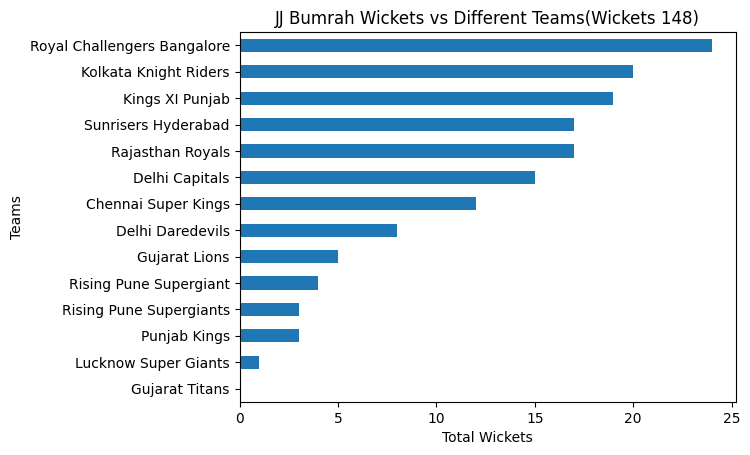

In [ ]:
statsvsteam('JJ Bumrah')

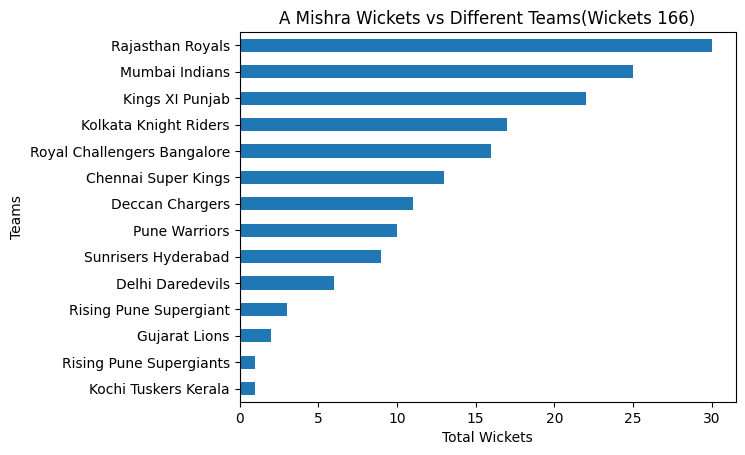

In [ ]:
statsvsteam('A Mishra')

In [ ]:
def runs_per_wickets(runs,wickets):
  if wickets>0:
    return runs/wickets
  else:
    return 0

def balls_per_wickets(balls,wickets):
  if wickets>0:
    return balls/wickets
  else:
    return 0

def runs_per_ball(runs,balls):
  if balls>0:
    return runs/balls
  else:
    return 0

def statsbyphase(data,currentphase):
  data=data[data.phase == currentphase]
  data.reset_index(inplace=True,drop=True)

  data['isDot']=data['total_runs'].apply(lambda x: 1 if x==0 else 0)
  data['isFour']=data['batsman_runs'].apply(lambda x: 1 if x==4 else 0)
  data['isSix']=data['batsman_runs'].apply(lambda x: 1 if x==6 else 0)

  runs=pd.DataFrame(data.groupby('bowler')['total_runs'].sum()).reset_index().rename(columns={'total_runs':'Runs'})
  innings=pd.DataFrame(data.groupby('bowler')['matchId'].apply(lambda x:len(list(np.unique(x))))).reset_index().rename(columns={'matchId':'Innings'})
  balls=pd.DataFrame(data.groupby('bowler')['matchId'].count()).reset_index().rename(columns={'matchId':'Balls'})
  wickets=pd.DataFrame(data.groupby('bowler')['bowlerwkt'].sum()).reset_index().rename(columns={'bowlerwkt':'Wickets'})

  dots=pd.DataFrame(data.groupby('bowler')['isDot'].sum()).reset_index().rename(columns={'isDot':'Dots'})
  fours=pd.DataFrame(data.groupby('bowler')['isFour'].sum()).reset_index().rename(columns={'isFour':'Fours'})
  sixes=pd.DataFrame(data.groupby('bowler')['isSix'].sum()).reset_index().rename(columns={'isSix':'Sixes'})

  data=pd.merge(innings,runs,on='bowler').merge(balls,on='bowler').merge(wickets,on='bowler').merge(dots,on='bowler').merge(fours,on='bowler').merge(sixes,on='bowler')
  data['Avg']=data.apply(lambda x: runs_per_wickets(x['Runs'],x['Wickets']),axis=1)
  data['SR']=data.apply(lambda x: balls_per_wickets(x['Balls'],x['Wickets']),axis=1)
  data['Eco']=data.apply(lambda x:6*(runs_per_ball(x['Runs'],x['Balls'])),axis=1)
  data['dot%']=data.apply(lambda x: 100*(x['Dots']/x['Balls']),axis=1)

  return data

###Powerplay Stats

In [ ]:
ppstats=statsbyphase(data,'Powerplay')
ppstats.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,1,20,6,0,2,2,2,0.000000,0.000000,20.000000,33.333333
1,A Chandila,12,139,144,10,70,13,4,13.900000,14.400000,5.791667,48.611111
2,A Choudhary,4,46,37,3,18,5,2,15.333333,12.333333,7.459459,48.648649
3,A Dananjaya,1,12,6,0,2,1,1,0.000000,0.000000,12.000000,33.333333
4,A Flintoff,2,21,12,0,3,2,1,0.000000,0.000000,10.500000,25.000000


###Middle Over Stats

In [ ]:
mostats=statsbyphase(data,'Middle Overs')
mostats.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,19,257,189,10,59,19,10,25.7,18.9,8.158730,31.216931
1,A Badoni,2,12,12,2,3,0,0,6.0,6.0,6.000000,25.000000
2,A Chandila,8,100,84,1,32,4,6,100.0,84.0,7.142857,38.095238
3,A Choudhary,4,58,44,1,17,6,2,58.0,44.0,7.909091,38.636364
4,A Dananjaya,1,35,19,0,4,1,3,0.0,0.0,11.052632,21.052632


###Death Over Stats

In [ ]:
dostats=statsbyphase(data,'Death Overs')
dostats.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,11,123,75,8,18,5,8,15.375000,9.375,9.840000,24.000000
1,A Chandila,1,6,6,0,1,0,0,0.000000,0.000,6.000000,16.666667
2,A Choudhary,3,40,27,1,7,2,2,40.000000,27.000,8.888889,25.925926
3,A Flintoff,2,52,18,1,1,3,5,52.000000,18.000,17.333333,5.555556
4,A Kumble,19,148,112,14,37,7,9,10.571429,8.000,7.928571,33.035714


####Top 10 Wicket Takers in Powerplay

In [ ]:
ppstats.groupby('bowler')['Wickets'].sum().sort_values(ascending=False).head(10)

bowler
B Kumar           55
Sandeep Sharma    54
UT Yadav          53
Z Khan            52
R Ashwin          46
I Sharma          44
DS Kulkarni       44
DL Chahar         43
TA Boult          40
P Kumar           40
Name: Wickets, dtype: int64

####Most Dot Balls in Powerplay

In [ ]:
ppstats.groupby('bowler')['Dots'].sum().sort_values(ascending=False).head(10)

bowler
B Kumar           969
P Kumar           812
Sandeep Sharma    689
I Sharma          639
Z Khan            637
DW Steyn          624
UT Yadav          615
SL Malinga        582
TA Boult          553
A Nehra           537
Name: Dots, dtype: int64

####Top 10 Wicket Takers in Middle Overs

In [ ]:
mostats.groupby('bowler')['Wickets'].sum().sort_values(ascending=False).head(10)

bowler
A Mishra           135
YS Chahal          130
PP Chawla          113
RA Jadeja          102
Harbhajan Singh    101
R Ashwin            95
Rashid Khan         89
SP Narine           73
AR Patel            72
DJ Bravo            71
Name: Wickets, dtype: int64

####Most Dot Balls in Middle Overs

In [ ]:
mostats.groupby('bowler')['Dots'].sum().sort_values(ascending=False).head(10)

bowler
A Mishra           996
PP Chawla          897
RA Jadeja          870
Harbhajan Singh    825
R Ashwin           823
YS Chahal          771
SP Narine          716
Rashid Khan        684
AR Patel           603
DJ Bravo           564
Name: Dots, dtype: int64

####Top 10 Wicket Takers in Death Overs

In [ ]:
dostats.groupby('bowler')['Wickets'].sum().sort_values(ascending=False).head(10)

bowler
DJ Bravo          102
SL Malinga         90
B Kumar            77
JJ Bumrah          70
SP Narine          55
CH Morris          55
Mohammed Shami     50
K Rabada           49
A Nehra            46
R Vinay Kumar      44
Name: Wickets, dtype: int64

####Most Dot Balls in Death Overs

In [ ]:
dostats.groupby('bowler')['Dots'].sum().sort_values(ascending=False).head(10)

bowler
DJ Bravo      322
JJ Bumrah     306
SL Malinga    285
B Kumar       274
SP Narine     250
DW Steyn      173
CH Morris     169
UT Yadav      161
SR Watson     154
K Rabada      152
Name: Dots, dtype: int64

####Top 10 Bowlers of Each Team

In [ ]:
def topwkttakerofteam(bowling_team):
  wkts=pd.DataFrame(data[data.bowling_team == bowling_team].groupby(['bowler'])['bowlerwkt'].sum().sort_values(ascending=False)).reset_index().rename(columns={'bowlerwkt':'Wickets'})
  inn=pd.DataFrame(data[data.bowling_team == bowling_team].groupby('bowler')['matchId'].apply(lambda x:len(list(np.unique(x))))).reset_index().rename(columns={'matchId':'Innings'})
  data1=wkts.merge(inn,on='bowler',how='inner')
  print(data1.head(10))

In [ ]:
csktopbowlers=topwkttakerofteam('Chennai Super Kings')

           bowler  Wickets  Innings
0        DJ Bravo      140      113
1       RA Jadeja      105      129
2        R Ashwin       90       94
3       JA Morkel       76       75
4       DL Chahar       58       58
5       MM Sharma       58       48
6       SN Thakur       55       47
7       SB Jakati       45       48
8  M Muralitharan       41       40
9    DE Bollinger       37       27


In [ ]:
rcbtopbowlers=topwkttakerofteam('Royal Challengers Bangalore')

           bowler  Wickets  Innings
0       YS Chahal      139      112
1        HV Patel       85       64
2   R Vinay Kumar       72       63
3          Z Khan       49       43
4  Mohammed Siraj       49       59
5       S Aravind       45       38
6        A Kumble       45       42
7        MA Starc       34       26
8         P Kumar       34       38
9        DW Steyn       32       33


In [ ]:
mitopbowlers=topwkttakerofteam('Mumbai Indians')

            bowler  Wickets  Innings
0       SL Malinga      170      122
1        JJ Bumrah      148      120
2  Harbhajan Singh      127      134
3   MJ McClenaghan       71       56
4       KA Pollard       69      107
5        KH Pandya       51       81
6        HH Pandya       42       60
7        RD Chahar       41       39
8         MM Patel       40       31
9         TA Boult       38       29


In [ ]:
matches=pd.read_csv('/content/drive/MyDrive/DATASETS/matches_updated_mens_ipl.csv')

In [ ]:
matches.head(5)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,...,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,...,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,...,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592
2,NaN,Indian Premier League,2017-04-07,male,K Srinivasan,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,...,field,Rajkot,YC Barde,NaN,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593
3,NaN,Indian Premier League,2017-04-08,male,R Pandit,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,...,field,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594
4,NaN,Indian Premier League,2017-04-08,male,Navdeep Singh,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,...,bat,Bengaluru,A Nand Kishore,NaN,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595


In [ ]:
def wintoss_winmatch(toss_winner,winner):
  if toss_winner==winner:
    return 1
  else:
    return 0

In [ ]:
matches['wintoss_winmatch']=matches.apply(lambda x: wintoss_winmatch(x['toss_winner'],x['winner']),axis=1)

In [ ]:
matches.head(10)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,...,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,wintoss_winmatch
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,...,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,0
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,...,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592,1
2,NaN,Indian Premier League,2017-04-07,male,K Srinivasan,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,...,Rajkot,YC Barde,NaN,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593,1
3,NaN,Indian Premier League,2017-04-08,male,R Pandit,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,...,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594,1
4,NaN,Indian Premier League,2017-04-08,male,Navdeep Singh,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,...,Bengaluru,A Nand Kishore,NaN,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595,1
5,NaN,Indian Premier League,2017-04-09,male,N Pandit,Sunrisers Hyderabad,Sunrisers Hyderabad,NJ Llong,M Nayyar,2017,...,Hyderabad,AY Dandekar,NaN,Sunrisers Hyderabad,A Deshmukh,6.0,NaN,9.0,1082596,1
6,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,...,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1082597,1
7,NaN,Indian Premier League,2017-04-10,male,R Pandit,Kings XI Punjab,Royal Challengers Bangalore,C Shamshuddin,Chinmay Sharma,2017,...,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,8.0,NaN,8.0,1082598,0
8,NaN,Indian Premier League,2017-04-11,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,J Srinath,2017,...,Pune,A Nand Kishore,NaN,Delhi Daredevils,AY Dandekar,9.0,NaN,NaN,1082599,0
9,NaN,Indian Premier League,2017-04-12,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,M Nayyar,2017,...,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,10.0,NaN,4.0,1082600,1


In [ ]:
matches.dtypes

outcome              object
event                object
date                 object
gender               object
reserve_umpire       object
team1                object
toss_winner          object
umpire2              object
match_referee        object
season               object
team2                object
winner_runs         float64
balls_per_over        int64
player_of_match      object
date1                object
neutralvenue         object
venue                object
method               object
toss_decision        object
city                 object
tv_umpire            object
date2                object
winner               object
umpire1              object
match_number        float64
eliminator           object
winner_wickets      float64
matchId               int64
wintoss_winmatch      int64
dtype: object

In [ ]:
matches[['toss_winner','winner','wintoss_winmatch']].head(10)

,toss_winner,winner,wintoss_winmatch
0,Royal Challengers Bangalore,Sunrisers Hyderabad,0
1,Rising Pune Supergiant,Rising Pune Supergiant,1
2,Kolkata Knight Riders,Kolkata Knight Riders,1
3,Kings XI Punjab,Kings XI Punjab,1
4,Royal Challengers Bangalore,Royal Challengers Bangalore,1
5,Sunrisers Hyderabad,Sunrisers Hyderabad,1
6,Mumbai Indians,Mumbai Indians,1
7,Royal Challengers Bangalore,Kings XI Punjab,0
8,Rising Pune Supergiant,Delhi Daredevils,0
9,Mumbai Indians,Mumbai Indians,1


In [ ]:
len(matches)

950

In [ ]:
100*(len(matches[matches.wintoss_winmatch ==1 ])/len(matches))

50.8421052631579

In [ ]:
seasontosshistory=pd.DataFrame(matches.groupby('season')['wintoss_winmatch'].sum()/matches.groupby('season')['wintoss_winmatch'].count()).reset_index().rename(columns={'wintoss_winmatch':'Win%'})
seasontosshistory

,season,Win%
0,2007/08,0.482759
1,2009,0.578947
2,2009/10,0.516667
3,2011,0.520548
4,2012,0.445946
5,2013,0.460526
6,2014,0.483333
7,2015,0.457627
8,2016,0.566667
9,2017,0.576271


In [ ]:
alldata=data.merge(matches,on='matchId',how='inner')
alldata.head(5)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,...,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,wintoss_winmatch
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,...,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,0


####Total Runs Scored at the Venue

In [ ]:
alldata.groupby('venue')['total_runs'].sum().sort_values(ascending=False)

venue
Eden Gardens                                            23658
Wankhede Stadium                                        23407
M Chinnaswamy Stadium                                   20263
Feroz Shah Kotla                                        18421
MA Chidambaram Stadium, Chepauk                         15277
Rajiv Gandhi International Stadium, Uppal               14888
Dubai International Cricket Stadium                     14450
Sawai Mansingh Stadium                                  14264
Punjab Cricket Association Stadium, Mohali              10987
Wankhede Stadium, Mumbai                                10301
Sheikh Zayed Stadium                                     8857
Sharjah Cricket Stadium                                  8583
Maharashtra Cricket Association Stadium                  7007
Dr DY Patil Sports Academy, Mumbai                       6573
Brabourne Stadium, Mumbai                                5824
M.Chinnaswamy Stadium                                    5127
Dr

####Total Matches played at the Venue

In [ ]:
alldata.groupby('venue')['matchId'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False)

venue
Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Feroz Shah Kotla                                        60
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Punjab Cricket Association Stadium, Mohali              35
Wankhede Stadium, Mumbai                                31
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Maharashtra Cricket Association Stadium                 22
Dr DY Patil Sports Academy, Mumbai                      20
Dr DY Patil Sports Academy                              17
Brabourne Stadium, Mumbai                               17
Subrata Roy Sahara Stadium                        

####Average Score at the Venue

In [ ]:
avgscorevenue=((alldata.groupby('venue')['total_runs'].sum())/((alldata.groupby('venue')['matchId'].apply(lambda x: len(list(np.unique(x)))))*2))
avgscorevenue

venue
Arun Jaitley Stadium                                    162.250000
Arun Jaitley Stadium, Delhi                             188.625000
Barabati Stadium                                        162.714286
Brabourne Stadium                                       174.050000
Brabourne Stadium, Mumbai                               171.294118
Buffalo Park                                            133.166667
De Beers Diamond Oval                                   149.500000
Dr DY Patil Sports Academy                              141.470588
Dr DY Patil Sports Academy, Mumbai                      164.325000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     144.076923
Dubai International Cricket Stadium                     157.065217
Eden Gardens                                            153.623377
Eden Gardens, Kolkata                                   194.750000
Feroz Shah Kotla                                        153.508333
Green Park                                              

In [ ]:
avgscorevenue.sort_values(ascending=False).head(10)

venue
Eden Gardens, Kolkata                           194.750000
Arun Jaitley Stadium, Delhi                     188.625000
Brabourne Stadium                               174.050000
Punjab Cricket Association IS Bindra Stadium    173.800000
Brabourne Stadium, Mumbai                       171.294118
M.Chinnaswamy Stadium                           170.900000
Saurashtra Cricket Association Stadium          166.650000
Wankhede Stadium, Mumbai                        166.145161
Dr DY Patil Sports Academy, Mumbai              164.325000
Barabati Stadium                                162.714286
dtype: float64

###Venue Wise Bowling Stats

In [ ]:
def runs_per_wickets(runs,wickets):
  if wickets>0:
    return runs/wickets
  else:
    return 0

def balls_per_wickets(balls,wickets):
  if wickets>0:
    return balls/wickets
  else:
    return 0

def runs_per_ball(runs,balls):
  if balls>0:
    return runs/balls
  else:
    return 0

def venuestats(alldata,currentphase,currentvenue):
  alldata=alldata[alldata.venue == currentvenue]
  alldata=alldata[alldata.phase == currentphase]
  alldata.reset_index(inplace=True,drop=True)

  alldata['isDot']=alldata['total_runs'].apply(lambda x: 1 if x==0 else 0)
  alldata['isFour']=alldata['batsman_runs'].apply(lambda x: 1 if x==4 else 0)
  alldata['isSix']=alldata['batsman_runs'].apply(lambda x: 1 if x==6 else 0)

  runs=pd.DataFrame(alldata.groupby('bowler')['total_runs'].sum()).reset_index().rename(columns={'total_runs':'Runs'})
  innings=pd.DataFrame(alldata.groupby('bowler')['matchId'].apply(lambda x:len(list(np.unique(x))))).reset_index().rename(columns={'matchId':'Innings'})
  balls=pd.DataFrame(alldata.groupby('bowler')['matchId'].count()).reset_index().rename(columns={'matchId':'Balls'})
  wickets=pd.DataFrame(alldata.groupby('bowler')['bowlerwkt'].sum()).reset_index().rename(columns={'bowlerwkt':'Wickets'})

  dots=pd.DataFrame(alldata.groupby('bowler')['isDot'].sum()).reset_index().rename(columns={'isDot':'Dots'})
  fours=pd.DataFrame(alldata.groupby('bowler')['isFour'].sum()).reset_index().rename(columns={'isFour':'Fours'})
  sixes=pd.DataFrame(alldata.groupby('bowler')['isSix'].sum()).reset_index().rename(columns={'isSix':'Sixes'})

  alldata=pd.merge(innings,runs,on='bowler').merge(balls,on='bowler').merge(wickets,on='bowler').merge(dots,on='bowler').merge(fours,on='bowler').merge(sixes,on='bowler')
  alldata['Avg']=alldata.apply(lambda x: runs_per_wickets(x['Runs'],x['Wickets']),axis=1)
  alldata['SR']=alldata.apply(lambda x: balls_per_wickets(x['Balls'],x['Wickets']),axis=1)
  alldata['Eco']=alldata.apply(lambda x:6*(runs_per_ball(x['Runs'],x['Balls'])),axis=1)
  alldata['dot%']=alldata.apply(lambda x: 100*(x['Dots']/x['Balls']),axis=1)

  return alldata

####Phasewise Bowling Stats of Bowlers at Chinnaswamy

In [ ]:
chinnaswamy=venuestats(alldata,'Powerplay','M Chinnaswamy Stadium')

In [ ]:
chinnaswamy.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Chandila,1,4,6,0,3,0,0,0.0,0.00,4.000000,50.000000
1,A Choudhary,2,20,18,1,10,2,1,20.0,18.00,6.666667,55.555556
2,A Kumble,3,16,18,0,9,2,0,0.0,0.00,5.333333,50.000000
3,A Mithun,3,30,25,0,7,4,0,0.0,0.00,7.200000,28.000000
4,A Nehra,6,98,85,4,44,9,5,24.5,21.25,6.917647,51.764706


In [ ]:
wickets=pd.DataFrame(chinnaswamy.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(chinnaswamy.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(chinnaswamy.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(chinnaswamy.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(chinnaswamy.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

chinnaswamypp=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
chinnaswamypp.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,Z Khan,14,24,7.241379,162,46.551724
1,S Aravind,14,19,6.604839,116,46.774194
2,DS Kulkarni,7,4,5.454545,33,60.000000
3,Sandeep Sharma,6,5,6.683544,47,59.493671
4,JH Kallis,6,12,6.300000,44,44.000000
5,UT Yadav,5,8,7.454545,42,42.424242
6,P Kumar,5,18,6.555066,112,49.339207
7,AB Dinda,5,8,6.220183,44,40.366972
8,R Rampaul,5,5,7.135135,38,51.351351
9,R Vinay Kumar,5,16,6.121622,69,46.621622


In [ ]:
chinnaswamy1=venuestats(alldata,'Middle Overs','M Chinnaswamy Stadium')

In [ ]:
chinnaswamy1.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,4,73,42,1,14,5,5,73.00,42.0,10.428571,33.333333
1,A Chandila,1,11,12,0,6,0,1,0.00,0.0,5.500000,50.000000
2,A Choudhary,2,26,25,1,12,2,1,26.00,25.0,6.240000,48.000000
3,A Kumble,12,306,246,6,78,25,9,51.00,41.0,7.463415,31.707317
4,A Mishra,4,127,92,4,23,9,4,31.75,23.0,8.282609,25.000000


In [ ]:
wickets=pd.DataFrame(chinnaswamy1.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(chinnaswamy1.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(chinnaswamy1.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(chinnaswamy1.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(chinnaswamy1.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

chinnaswamymo=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
chinnaswamymo.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,YS Chahal,26,25,7.529412,157,34.204793
1,R Vinay Kumar,12,18,7.884956,78,34.513274
2,M Muralitharan,10,11,6.029126,74,35.922330
3,SR Watson,9,13,6.392523,44,41.121495
4,PP Chawla,8,11,9.032967,57,31.318681
5,KV Sharma,7,4,6.423529,30,35.294118
6,DL Vettori,7,10,5.400000,66,36.666667
7,JH Kallis,6,15,7.281250,61,31.770833
8,Harbhajan Singh,6,8,7.436620,48,33.802817
9,CJ Jordan,6,5,6.813559,19,32.203390


In [ ]:
chinnaswamy2=venuestats(alldata,'Death Overs','M Chinnaswamy Stadium')

In [ ]:
chinnaswamy2.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,1,13,6,1,1,1,1,13.000000,6.0,13.000000,16.666667
1,A Chandila,1,6,6,0,1,0,0,0.000000,0.0,6.000000,16.666667
2,A Choudhary,1,11,12,1,6,1,0,11.000000,12.0,5.500000,50.000000
3,A Kumble,5,41,27,3,9,1,4,13.666667,9.0,9.111111,33.333333
4,A Mithun,5,75,44,2,14,6,5,37.500000,22.0,10.227273,31.818182


In [ ]:
wickets=pd.DataFrame(chinnaswamy2.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(chinnaswamy2.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(chinnaswamy2.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(chinnaswamy2.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(chinnaswamy2.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

chinnaswamydo=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
chinnaswamydo.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,RP Singh,11,10,8.181818,30,34.090909
1,R Vinay Kumar,10,19,9.633803,47,33.098592
2,P Kumar,8,11,10.620000,27,27.000000
3,Z Khan,8,17,8.191304,34,29.565217
4,SR Watson,6,12,12.367347,22,22.448980
5,S Aravind,6,8,7.066667,17,37.777778
6,UT Yadav,5,5,13.565217,10,21.739130
7,MA Starc,5,7,9.705882,16,23.529412
8,A Nehra,4,3,11.280000,7,28.000000
9,CJ Jordan,4,4,10.933333,10,22.222222


####Comparison of Bowlers after Standarizing all the Factors

#####For Chinnaswamy Stadium in Middle Overs

In [ ]:
chinnaswamy1=chinnaswamy1[(chinnaswamy1.Balls >= 50) & (chinnaswamy1.Wickets > 3)]

In [ ]:
max_val=max(chinnaswamy1['dot%'])
min_val=min(chinnaswamy1['dot%'])

chinnaswamy1['mx_dot%']=chinnaswamy1['dot%'].apply(lambda x: (x-min_val)/(max_val - min_val))

In [ ]:
max_val=max(chinnaswamy1['Eco'])
min_val=min(chinnaswamy1['Eco'])

chinnaswamy1['mx_Eco']=chinnaswamy1['Eco'].apply(lambda x: (x-min_val)/(max_val - min_val))

In [ ]:
max_val=max(chinnaswamy1['SR'])
min_val=min(chinnaswamy1['SR'])

chinnaswamy1['mx_SR']=chinnaswamy1['SR'].apply(lambda x: (x-min_val)/(max_val - min_val))

In [ ]:
max_val=max(chinnaswamy1['Avg'])
min_val=min(chinnaswamy1['Avg'])

chinnaswamy1['mx_Avg']=chinnaswamy1['Avg'].apply(lambda x: (x-min_val)/(max_val - min_val))

In [ ]:
chinnaswamy1['minmax_score']=chinnaswamy1.apply(lambda x:x['mx_SR']*0.35+x['mx_Avg']*0.35+x['mx_Eco']*0.15+x['mx_dot%']*0.15,axis=1)

#####Top 10 Least Effective Bowlers at Chinnaswamy in Middle Overs

In [ ]:
chinnaswamy1.sort_values('minmax_score',ascending=False).head(10)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%,mx_dot%,mx_Eco,mx_SR,mx_Avg,minmax_score
3,A Kumble,12,306,246,6,78,25,9,51.000000,41.000000,7.463415,31.707317,0.457681,0.583831,1.000000,1.000000,0.856227
72,JH Kallis,15,233,192,6,61,20,5,38.833333,32.000000,7.281250,31.770833,0.461340,0.535530,0.711230,0.694561,0.641557
58,HV Patel,13,207,152,6,54,16,9,34.500000,25.333333,8.171053,35.526316,0.677681,0.771462,0.497326,0.585774,0.596457
115,PP Chawla,11,274,182,8,57,20,14,34.250000,22.750000,9.032967,31.318681,0.435293,1.000000,0.414439,0.579498,0.563172
69,JD Unadkat,9,175,129,5,34,15,5,35.000000,25.800000,8.139535,26.356589,0.149444,0.763105,0.512299,0.598326,0.525601
128,RA Jadeja,7,152,128,5,41,11,4,30.400000,25.600000,7.125000,32.031250,0.476342,0.494100,0.505882,0.482845,0.491621
59,Harbhajan Singh,8,176,142,6,48,11,9,29.333333,23.666667,7.436620,33.802817,0.578396,0.576726,0.443850,0.456067,0.488239
180,Yuvraj Singh,6,144,103,5,28,6,9,28.800000,20.600000,8.388350,27.184466,0.197135,0.829079,0.345455,0.442678,0.429778
127,R Vinay Kumar,18,297,226,12,78,28,10,24.750000,18.833333,7.884956,34.513274,0.619323,0.695603,0.288770,0.341004,0.417660
48,DL Vettori,10,162,180,7,66,9,2,23.142857,25.714286,5.400000,36.666667,0.743372,0.036713,0.509549,0.300658,0.400585


#####Top 10 Most Effective Bowlers at Chinnaswamy in Middle Overs

In [ ]:
chinnaswamy1.sort_values('minmax_score',ascending=True).head(10)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%,mx_dot%,mx_Eco,mx_SR,mx_Avg,minmax_score
38,CJ Jordan,5,67,59,6,19,4,2,11.166667,9.833333,6.813559,32.203390,0.486258,0.411521,0.000000,0.000000,0.134667
151,SK Trivedi,3,57,65,5,26,1,2,11.400000,13.000000,5.261538,40.000000,0.935394,0.000000,0.101604,0.005858,0.177921
83,KV Sharma,4,91,85,7,30,4,4,13.000000,12.142857,6.423529,35.294118,0.664305,0.308104,0.074102,0.046025,0.187906
157,SR Watson,13,114,107,9,44,11,2,12.666667,11.888889,6.392523,41.121495,1.000000,0.299882,0.065954,0.037657,0.231246
94,M Muralitharan,11,207,206,10,74,14,4,20.700000,20.600000,6.029126,35.922330,0.700494,0.203527,0.345455,0.239331,0.340278
179,YS Chahal,25,576,459,26,157,31,29,22.153846,17.653846,7.529412,34.204793,0.601552,0.601330,0.250926,0.275829,0.364796
112,P Negi,6,135,101,5,24,4,8,27.000000,20.200000,8.019802,23.762376,0.000000,0.731358,0.332620,0.397490,0.365242
134,S Aravind,12,114,93,5,31,15,1,22.800000,18.600000,7.354839,33.333333,0.551350,0.555042,0.281283,0.292050,0.366626
88,L Balaji,6,111,80,5,29,8,5,22.200000,16.000000,8.325000,36.250000,0.719370,0.812281,0.197861,0.276987,0.395945
48,DL Vettori,10,162,180,7,66,9,2,23.142857,25.714286,5.400000,36.666667,0.743372,0.036713,0.509549,0.300658,0.400585


####Phasewise Bowling Stats of Bowlers at Wankhede

In [ ]:
wankhede=venuestats(alldata,'Powerplay','Wankhede Stadium')

In [ ]:
wankhede.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Choudhary,1,10,12,1,6,1,0,10.000000,12.000000,5.000000,50.000000
1,A Dananjaya,1,12,6,0,2,1,1,0.000000,0.000000,12.000000,33.333333
2,A Mithun,1,1,6,0,5,0,0,0.000000,0.000000,1.000000,83.333333
3,A Nehra,9,176,128,3,60,27,4,58.666667,42.666667,8.250000,46.875000
4,A Singh,1,20,18,1,7,1,1,20.000000,18.000000,6.666667,38.888889


In [ ]:
wickets=pd.DataFrame(wankhede.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(wankhede.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(wankhede.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(wankhede.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(wankhede.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

wankhedepp=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
wankhedepp.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,MJ McClenaghan,16,25,7.830189,135,42.452830
1,MG Johnson,12,14,7.079365,97,51.322751
2,SL Malinga,11,41,6.612245,191,48.724490
3,Harbhajan Singh,11,21,6.491803,93,50.819672
4,MM Patel,10,17,6.097826,97,52.717391
5,DS Kulkarni,9,14,7.222222,77,47.530864
6,I Sharma,8,6,7.177570,53,49.532710
7,SR Watson,7,7,6.272727,44,50.000000
8,Sandeep Sharma,6,7,7.000000,53,49.074074
9,JJ Bumrah,6,31,6.637363,129,47.252747


In [ ]:
wankhede1=venuestats(alldata,'Middle Overs','Wankhede Stadium')

In [ ]:
wankhede1.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,1,5,6,0,4,1,0,0.0,0.000000,5.000000,66.666667
1,A Choudhary,1,10,6,0,2,2,0,0.0,0.000000,10.000000,33.333333
2,A Dananjaya,1,35,19,0,4,1,3,0.0,0.000000,11.052632,21.052632
3,A Mishra,6,126,124,6,42,3,5,21.0,20.666667,6.096774,33.870968
4,A Mithun,1,31,14,1,1,2,2,31.0,14.000000,13.285714,7.142857


In [ ]:
wickets=pd.DataFrame(wankhede1.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(wankhede1.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(wankhede1.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(wankhede1.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(wankhede1.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

wankhedemo=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
wankhedemo.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,Harbhajan Singh,33,47,7.049818,268,32.563791
1,SL Malinga,16,36,6.928793,110,34.055728
2,HH Pandya,15,24,8.128302,81,30.566038
3,KH Pandya,14,22,6.842697,96,26.966292
4,PP Ojha,13,15,7.721973,83,37.219731
5,KA Pollard,12,27,8.157303,92,25.842697
6,DS Kulkarni,11,13,8.678571,41,36.607143
7,DJ Bravo,10,12,7.407407,49,30.246914
8,JJ Bumrah,8,26,6.953846,71,36.410256
9,MM Patel,8,14,7.181818,49,37.121212


In [ ]:
wankhede2=venuestats(alldata,'Death Overs','Wankhede Stadium')

In [ ]:
wankhede2.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,1,6,8,1,4,0,0,6.0,8.0,4.500000,50.000000
1,A Choudhary,1,12,7,0,1,0,1,0.0,0.0,10.285714,14.285714
2,A Mishra,3,43,20,0,5,3,3,0.0,0.0,12.900000,25.000000
3,A Nehra,6,84,43,5,10,6,6,16.8,8.6,11.720930,23.255814
4,A Singh,1,9,6,1,2,0,1,9.0,6.0,9.000000,33.333333


In [ ]:
wickets=pd.DataFrame(wankhede2.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(wankhede2.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(wankhede2.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(wankhede2.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(wankhede2.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

wankhededo=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
wankhededo.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,SL Malinga,41,37,7.115044,116,34.218289
1,JJ Bumrah,22,30,9.412141,83,26.517572
2,MJ McClenaghan,14,21,10.329114,42,26.582278
3,KA Pollard,8,14,10.536585,21,25.609756
4,DJ Bravo,7,10,9.842105,25,21.929825
5,HH Pandya,5,10,12.575342,21,28.767123
6,A Nehra,5,6,11.720930,10,23.255814
7,MM Patel,5,10,10.298507,17,25.373134
8,JD Unadkat,5,5,11.094340,17,32.075472
9,MM Sharma,5,7,11.353846,14,21.538462


####Comparison of Bowlers after Standarizing all the Factors

#####For Wankhede Stadium in Death Overs

In [ ]:
wankhede2=wankhede2[(wankhede2.Balls >= 30)&(wankhede2.Wickets > 3)]

In [ ]:
max_val=max(wankhede2['dot%'])
min_val=min(wankhede2['dot%'])

wankhede2['mx_dot%']=wankhede2['dot%'].apply(lambda x: (x-min_val)/(max_val - min_val))      

In [ ]:
max_val=max(wankhede2['Eco'])
min_val=min(wankhede2['Eco'])

wankhede2['mx_Eco']=wankhede2['Eco'].apply(lambda x: (x-min_val)/(max_val - min_val))      

In [ ]:
max_val=max(wankhede2['Avg'])
min_val=min(wankhede2['Avg'])

wankhede2['mx_Avg']=wankhede2['Avg'].apply(lambda x: (x-min_val)/(max_val - min_val))      

In [ ]:
max_val=max(wankhede2['SR'])
min_val=min(wankhede2['SR'])

wankhede2['mx_SR']=wankhede2['SR'].apply(lambda x: (x-min_val)/(max_val - min_val))      

In [ ]:
wankhede2['minmax_score']=wankhede2.apply(lambda x:(x['mx_SR']*0.20 + x['mx_Avg']*0.25 + x['mx_dot%']*0.25 + x['mx_Eco']*0.30),axis=1)

In [ ]:
wankhede2.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%,mx_dot%,mx_Eco,mx_Avg,mx_SR,minmax_score
3,A Nehra,6,84,43,5,10,6,6,16.800000,8.600000,11.720930,23.255814,0.117848,0.843523,0.336383,0.102326,0.387080
36,DJ Bravo,10,187,114,7,25,12,10,26.714286,16.285714,9.842105,21.929825,0.026856,0.499434,0.813143,0.817276,0.523285
40,DS Kulkarni,10,98,73,4,22,5,4,24.500000,18.250000,8.054795,30.136986,0.590045,0.172106,0.706662,1.000000,0.575809
44,HH Pandya,10,153,73,5,21,10,13,30.600000,14.600000,12.575342,28.767123,0.496043,1.000000,1.000000,0.660465,0.806104
46,Harbhajan Singh,7,68,42,5,11,7,3,13.600000,8.400000,9.714286,26.190476,0.319229,0.476026,0.182501,0.083721,0.284984


#####Top 10 Least Effective Bowlers at Wankhede in Death Overs

In [ ]:
wankhede2.sort_values('minmax_score',ascending=False).head(10)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%,mx_dot%,mx_Eco,mx_Avg,mx_SR,minmax_score
44,HH Pandya,10,153,73,5,21,10,13,30.600000,14.600000,12.575342,28.767123,0.496043,1.000000,1.000000,0.660465,0.806104
79,MG Johnson,11,104,72,4,26,12,3,26.000000,18.000000,8.666667,36.111111,1.000000,0.284164,0.778794,0.976744,0.725297
40,DS Kulkarni,10,98,73,4,22,5,4,24.500000,18.250000,8.054795,30.136986,0.590045,0.172106,0.706662,1.000000,0.575809
57,JD Unadkat,5,98,53,5,17,5,9,19.600000,10.600000,11.094340,32.075472,0.723068,0.728769,0.471030,0.288372,0.574829
36,DJ Bravo,10,187,114,7,25,12,10,26.714286,16.285714,9.842105,21.929825,0.026856,0.499434,0.813143,0.817276,0.523285
82,MM Sharma,7,123,65,5,14,10,8,24.600000,13.000000,11.353846,21.538462,0.000000,0.776295,0.711471,0.511628,0.513082
81,MM Patel,10,115,67,5,17,11,5,23.000000,13.400000,10.298507,25.373134,0.263142,0.583020,0.634530,0.548837,0.509091
59,JJ Bumrah,30,491,313,22,83,41,20,22.318182,14.227273,9.412141,26.517572,0.341675,0.420691,0.601742,0.625793,0.487220
80,MJ McClenaghan,21,272,158,14,42,17,18,19.428571,11.285714,10.329114,26.582278,0.346115,0.588625,0.462786,0.352159,0.449245
124,SP Narine,5,67,45,4,14,3,5,16.750000,11.250000,8.933333,31.111111,0.656891,0.333002,0.333978,0.348837,0.417385


#####Top 10 Most Effective Bowlers at Wankhede in Death Overs

In [ ]:
wankhede2.sort_values('minmax_score',ascending=True).head(10)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%,mx_dot%,mx_Eco,mx_Avg,mx_SR,minmax_score
94,P Kumar,5,48,30,4,7,4,2,12.000000,7.500000,9.600000,23.333333,0.123167,0.455095,0.105559,0.000000,0.193710
121,SL Malinga,37,402,339,41,116,26,14,9.804878,8.268293,7.115044,34.218289,0.870111,0.000000,0.000000,0.071469,0.231822
46,Harbhajan Singh,7,68,42,5,11,7,3,13.600000,8.400000,9.714286,26.190476,0.319229,0.476026,0.182501,0.083721,0.284984
3,A Nehra,6,84,43,5,10,6,6,16.800000,8.600000,11.720930,23.255814,0.117848,0.843523,0.336383,0.102326,0.387080
63,KA Pollard,14,144,82,8,21,13,6,18.000000,10.250000,10.536585,25.609756,0.279379,0.626622,0.394089,0.255814,0.407516
124,SP Narine,5,67,45,4,14,3,5,16.750000,11.250000,8.933333,31.111111,0.656891,0.333002,0.333978,0.348837,0.417385
80,MJ McClenaghan,21,272,158,14,42,17,18,19.428571,11.285714,10.329114,26.582278,0.346115,0.588625,0.462786,0.352159,0.449245
59,JJ Bumrah,30,491,313,22,83,41,20,22.318182,14.227273,9.412141,26.517572,0.341675,0.420691,0.601742,0.625793,0.487220
81,MM Patel,10,115,67,5,17,11,5,23.000000,13.400000,10.298507,25.373134,0.263142,0.583020,0.634530,0.548837,0.509091
82,MM Sharma,7,123,65,5,14,10,8,24.600000,13.000000,11.353846,21.538462,0.000000,0.776295,0.711471,0.511628,0.513082


####Phasewise Bowling Stats of Bowlers at Chepauk

In [ ]:
chepauk=venuestats(alldata,'Powerplay','MA Chidambaram Stadium, Chepauk')

In [ ]:
chepauk.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Chandila,1,13,12,1,4,0,1,13.000000,12.000000,6.500000,33.333333
1,A Kumble,2,5,12,0,7,0,0,0.000000,0.000000,2.500000,58.333333
2,A Mishra,1,12,6,0,2,1,1,0.000000,0.000000,12.000000,33.333333
3,A Mithun,1,13,6,0,1,1,1,0.000000,0.000000,13.000000,16.666667
4,A Nehra,11,179,158,7,78,28,1,25.571429,22.571429,6.797468,49.367089


In [ ]:
wickets=pd.DataFrame(chepauk.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(chepauk.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(chepauk.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(chepauk.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(chepauk.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

chepaukpp=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
chepaukpp.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,R Ashwin,14,26,5.912088,132,48.351648
1,JA Morkel,10,25,8.036697,127,38.837920
2,MM Sharma,10,13,7.153846,85,46.703297
3,A Nehra,7,11,6.797468,78,49.367089
4,MS Gony,6,9,7.901408,67,47.183099
5,BW Hilfenhaus,5,4,5.057143,34,48.571429
6,IC Pandey,4,3,7.636364,23,52.272727
7,WPUJC Vaas,3,1,4.666667,13,72.222222
8,DE Bollinger,3,14,7.571429,74,44.047619
9,CH Morris,3,4,8.045455,21,47.727273


In [ ]:
chepauk1=venuestats(alldata,'Middle Overs','MA Chidambaram Stadium, Chepauk')

In [ ]:
chepauk1.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,1,8,7,0,1,0,0,0.0,0.0,6.857143,14.285714
1,A Chandila,1,3,6,0,3,0,0,0.0,0.0,3.000000,50.000000
2,A Kumble,2,28,36,4,17,2,0,7.0,9.0,4.666667,47.222222
3,A Mishra,5,98,90,5,35,5,4,19.6,18.0,6.533333,38.888889
4,A Mithun,1,22,12,0,2,3,0,0.0,0.0,11.000000,16.666667


In [ ]:
wickets=pd.DataFrame(chepauk1.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(chepauk1.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(chepauk1.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(chepauk1.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(chepauk1.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

chepaukmo=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
chepaukmo.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,R Ashwin,25,34,6.153846,179,35.305720
1,SB Jakati,18,23,7.402985,128,31.840796
2,DJ Bravo,16,30,7.203008,111,27.819549
3,JA Morkel,9,20,7.285714,59,28.095238
4,RA Jadeja,9,19,6.936803,82,30.483271
5,M Muralitharan,8,14,6.841727,101,36.330935
6,PP Ojha,6,5,4.891304,35,38.043478
7,A Mishra,5,5,6.533333,35,38.888889
8,J Syed Mohammad,5,3,7.714286,15,30.612245
9,PP Chawla,5,5,7.153846,30,28.846154


In [ ]:
chepauk2=venuestats(alldata,'Death Overs','MA Chidambaram Stadium, Chepauk')

In [ ]:
chepauk2.head(5)

,bowler,Innings,Runs,Balls,Wickets,Dots,Fours,Sixes,Avg,SR,Eco,dot%
0,A Ashish Reddy,2,23,11,1,3,3,1,23.000000,11.000000,12.545455,27.272727
1,A Mishra,1,2,7,1,5,0,0,2.000000,7.000000,1.714286,71.428571
2,A Mithun,1,13,6,0,2,1,1,0.000000,0.000000,13.000000,33.333333
3,A Nehra,11,123,83,7,21,10,4,17.571429,11.857143,8.891566,25.301205
4,A Singh,1,13,6,0,0,2,0,0.000000,0.000000,13.000000,0.000000


In [ ]:
wickets=pd.DataFrame(chepauk2.groupby('bowler')['Wickets'].sum().sort_values(ascending=False)).reset_index()
innings=pd.DataFrame(chepauk2.groupby('bowler')['Innings'].sum().sort_values(ascending=False)).reset_index()
economy=pd.DataFrame(chepauk2.groupby('bowler')['Eco'].sum().sort_values(ascending=False)).reset_index()
dots=pd.DataFrame(chepauk2.groupby('bowler')['Dots'].sum().sort_values(ascending=False)).reset_index()
dotper=pd.DataFrame(chepauk2.groupby('bowler')['dot%'].sum().sort_values(ascending=False)).reset_index().rename(columns={'dot%':'Dot%'})

chepaukdo=wickets.merge(innings,on='bowler',how='inner').merge(economy,on='bowler',how='inner').merge(dots,on='bowler',how='inner').merge(dotper,on='bowler',how='inner')
chepaukdo.head(10)

,bowler,Wickets,Innings,Eco,Dots,Dot%
0,DJ Bravo,25,24,8.600760,73,27.756654
1,JA Morkel,17,18,8.123077,38,29.230769
2,DE Bollinger,13,14,7.463415,44,35.772358
3,A Nehra,7,11,8.891566,21,25.301205
4,M Muralitharan,5,8,7.965517,22,37.931034
5,CH Morris,5,7,10.100000,14,23.333333
6,JH Kallis,4,5,8.714286,10,23.809524
7,MM Sharma,4,6,7.894737,13,34.210526
8,R Ashwin,4,12,6.389610,24,31.168831
9,MM Patel,3,3,7.200000,10,40.000000
